In [1]:
import cv2

In [ ]:
image = cv2.imread('test_image.jpg')
cv2.imshow('result', image)
cv2.waitKey(0)


In [ ]:
#video 55
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result', image)
cv2.waitKey(0)


In [ ]:
#video 56
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow('result', blur)
cv2.waitKey(0)

In [ ]:
#video 57
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(blur, 50, 150)
cv2.imshow('result', canny)
cv2.waitKey(0)

In [ ]:
#video 58
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
   
def region_of_interest(image):
    # canny image has dimension(m,n), m is the height, so shape[0]
    height = image.shape[0]
    #create a triangle
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    #create an array of only 0s with dimension of the image
    mask = np.zeros_like(image)
    #fill the mask with triangle
    cv2.fillPoly(mask, polygons, 255)
    return mask

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
#plt.imshow(region_of_interest(canny))
#plt.show()
cv2.imshow('result', region_of_interest(canny))
cv2.waitKey(0)

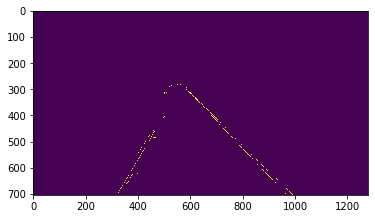

In [3]:
#video 59- bitwise_and
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
   
def region_of_interest(image):
    # canny image has dimension(m,n), m is the height, so shape[0]
    height = image.shape[0]
    #create a triangle
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    #create an array of only 0s with dimension of the image
    mask = np.zeros_like(image)
    #fill the mask with triangle
    cv2.fillPoly(mask, polygons, 255)
    #bitwise
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
plt.imshow(cropped_image)
plt.show()
#cv2.imshow('result', cropped_image)
#cv2.waitKey(0)

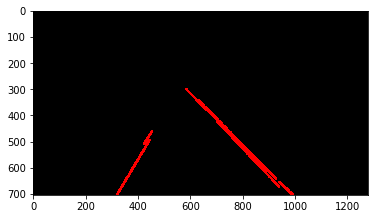

In [7]:
#video 61- hough transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image) #image space with only 0s, black
    if lines is not None:
        for line in lines:
            #each line is a 2D array containing our line coordinates in the form
           #[[x1,y1,x2,y2]]. these coordinates specify the line's parameters, as well as the
            #location of the lines with respect to the image space, ensuring that they are placed in the correct position
         
            #change from 2D array into 1D array
            # from 1row, 2col into 1 row: [x1,y1,x2,y2]
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10) 
            #(image space, first point, second point, color, thickness of the line)
    return line_image
        
        
        
        
def region_of_interest(image):
    # canny image has dimension(m,n), m is the height, so shape[0]
    height = image.shape[0]
    #create a triangle
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    #create an array of only 0s with dimension of the image
    mask = np.zeros_like(image)
    #fill the mask with triangle
    cv2.fillPoly(mask, polygons, 255)
    #bitwise
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
#lines = cv2.HoughLinesP(cropped_image, 2, 1) # precision of 2 pixels, 1 degree in radian=pi/180
lines = cv2.HoughLinesP(cropped_image, 
                        2, 
                        np.pi/180, 
                        100, np.array([]), 
                        minLineLength =40, 
                        maxLineGap=5 )
# precision of 2 pixels, 1 degree in radian=pi/180, threshold of 100
image_line = display_lines(lane_image, lines)# the original image, the lines
combo_image = cv2.addWeighted(lane_image, 0.8, image_line, 1, 1) 
# original image, weight, line image, additional value, gammar value 
#(original image X weight),( array Line_image with additional 1 in values), 1 gammar
plt.imshow(image_line)
plt.show()
#cv2.imshow('result', cropped_image)
#cv2.waitKey(0)

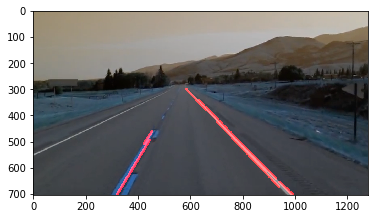

In [10]:
#video 61- hough transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image) #image space with only 0s, black
    if lines is not None:
        for line in lines:
            #each line is a 2D array containing our line coordinates in the form
           #[[x1,y1,x2,y2]]. these coordinates specify the line's parameters, as well as the
            #location of the lines with respect to the image space, ensuring that they are placed in the correct position
         
            #change from 2D array into 1D array
            # from 1row, 2col into 1 row: [x1,y1,x2,y2]
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10) 
            #(image space, first point, second point, color, thickness of the line)
    return line_image
        
        
        
        
def region_of_interest(image):
    # canny image has dimension(m,n), m is the height, so shape[0]
    height = image.shape[0]
    #create a triangle
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    #create an array of only 0s with dimension of the image
    mask = np.zeros_like(image)
    #fill the mask with triangle
    cv2.fillPoly(mask, polygons, 255)
    #bitwise
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
#lines = cv2.HoughLinesP(cropped_image, 2, 1) # precision of 2 pixels, 1 degree in radian=pi/180
lines = cv2.HoughLinesP(cropped_image, 
                        2, 
                        np.pi/180, 
                        100, np.array([]), 
                        minLineLength =40, 
                        maxLineGap=5 )
# precision of 2 pixels, 1 degree in radian=pi/180, threshold of 100
image_line = display_lines(lane_image, lines)# the original image, the lines
combo_image = cv2.addWeighted(lane_image, 0.8, image_line, 1, 1) 
# original image, weight, line image, additional value, gammar value 
#(original image X weight),( array Line_image with additional 1 in values), 1 gammar
plt.imshow(combo_image)
plt.show()
#cv2.imshow('result', combo_image)
#cv2.waitKey(0)

In [1]:
import cv2
import numpy as np
 
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]
 
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines
 
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny
 
def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image
 
def region_of_interest(canny):
    height = canny.shape[0]
    width = canny.shape[1]
    mask = np.zeros_like(canny)
 
    triangle = np.array([[
    (200, height),
    (550, 250),
    (1100, height),]], np.int32)
 
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image
 
 
# image = cv2.imread('test_image.jpg')
# lane_image = np.copy(image)
# lane_canny = canny(lane_image)
# cropped_canny = region_of_interest(lane_canny)
# lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
# averaged_lines = average_slope_intercept(image, lines)
# line_image = display_lines(lane_image, averaged_lines)
# combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)
 
#
cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny(frame)
    cropped_canny = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("result", combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: cannot unpack non-iterable numpy.float64 object